# Project 2 - Ames Housing Data and Kaggle Challenge

## Part 1 

### Contents:
- [Problem statement and objectives](#Problem-statement-and-objectives)
- [Data cleaning of train set](#Data-cleaning---train-set)
- [Feature engineering](#Feature-engineering)


### Problem statement and objectives

#### Problem statement
- The client is a mid-size real estate agency. 
- Since its establishment more than a decade ago, it has closed numerous real estate deals and kept detailed records of such real estate sold.
- As part of its digitalisation initiatives, the client is keen to monetise its dataset. It wishes to outsource the development of an in-house model to predict the sale price of real estate in that area.
- Such model is meant to assist its real estate agents in their selling and marketing activities. If the real estate agent can help give potential housebuyers some insight of selling prices or what features to look out for to justify sale prices, such capability can boost the competitiveness of the agency in the long run.  

#### Objectives
- To develop a linear regression model to predict sale prices of residential real estate
- The model to be develop will have a target R-squared score of above 70% (Note - R-squared is the percentage of the dependent variable (in this case, features / characteristics of the real estate) variation that a linear model explains)
- The model is not meant to be foolproof. The model is to help guide real estate agents in their selling and marketing activities. The users of the model are expected to exercise some judgement when using the model. There are scenarios where the model may not be relied upon in its entirety, for eg. selling the property in an auction process. In times like this, the Sale Price will be a 'firesale', not based on market price.    

### Importing

In [1]:
# import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import matplotlib.patches as mpatches
import scipy.stats as stats
from numpy.random import rand
import matplotlib.cm as cm
from matplotlib.colors import Normalize


%matplotlib inline

### Data cleaning - train set 

In [2]:
datatrain = pd.read_csv('./datasets/train.csv')

#to be able to see all columns
pd.set_option('display.max_columns', None)

In [3]:
#checking what's inside:

datatrain.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#checking for nulls

datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
#counting number of nulls

datatrain_null_or_not = pd.DataFrame(datatrain.isnull().sum(), columns=['null_count'])

In [6]:
#adding a percentage column to ascertain the proportion of null

datatrain_null_or_not['proportion_null'] = round(datatrain_null_or_not['null_count'] / 2051 * 100, 1)

In [7]:
#filter out non-nulls

datatrain_null = datatrain_null_or_not[datatrain_null_or_not['null_count'] > 0]

In [8]:
# datatrain_null.head()

In [9]:
# to ascertain how significant are the nulls compared to the whole dataset

datatrain_null.sort_values(by=['proportion_null'], ascending = False)

,null_count,proportion_null
Pool QC,2042,99.6
Misc Feature,1986,96.8
Alley,1911,93.2
Fence,1651,80.5
Fireplace Qu,1000,48.8
Lot Frontage,330,16.1
Garage Yr Blt,114,5.6
Garage Cond,114,5.6
Garage Qual,114,5.6
Garage Finish,114,5.6


#### Dealing with missing values

Comment - for columns with proportion null of 5.6% and less, I shall assign a zero / 'None' value since the number of nulls are **insignificant** compared to the whole dataset 

In [10]:
#these are the columns with insignificant number of NaN, i.e. 5.6% and below.

features_insignificant_null = ['BsmtFin SF 1', 
            'Garage Area', 
            'Garage Cars', 
            'BsmtFin SF 2', 
            'Bsmt Unf SF',
            'Total Bsmt SF',                   
            'Bsmt Full Bath', 
            'Bsmt Half Bath',
            'Mas Vnr Type',
           'Mas Vnr Area',
           'BsmtFin Type 1',
           'Bsmt Qual',
           'Bsmt Cond',
           'BsmtFin Type 2',
           'Bsmt Exposure',
           'Garage Type',
           'Garage Finish',
           'Garage Qual',
           'Garage Cond',
           'Garage Yr Blt']

In [11]:
# to check which is float and which is object. 

datatrain[features_insignificant_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BsmtFin SF 1    2050 non-null   float64
 1   Garage Area     2050 non-null   float64
 2   Garage Cars     2050 non-null   float64
 3   BsmtFin SF 2    2050 non-null   float64
 4   Bsmt Unf SF     2050 non-null   float64
 5   Total Bsmt SF   2050 non-null   float64
 6   Bsmt Full Bath  2049 non-null   float64
 7   Bsmt Half Bath  2049 non-null   float64
 8   Mas Vnr Type    2029 non-null   object 
 9   Mas Vnr Area    2029 non-null   float64
 10  BsmtFin Type 1  1996 non-null   object 
 11  Bsmt Qual       1996 non-null   object 
 12  Bsmt Cond       1996 non-null   object 
 13  BsmtFin Type 2  1995 non-null   object 
 14  Bsmt Exposure   1993 non-null   object 
 15  Garage Type     1938 non-null   object 
 16  Garage Finish   1937 non-null   object 
 17  Garage Qual     1937 non-null   o

In [12]:
# for those features with float, I'll assign a zero

features_insignificant_null_float = ['BsmtFin SF 1', 
            'Garage Area', 
            'Garage Cars', 
            'BsmtFin SF 2', 
            'Bsmt Unf SF',
            'Total Bsmt SF',                   
            'Bsmt Full Bath', 
            'Bsmt Half Bath',
            'Mas Vnr Area',
            'Garage Yr Blt']

for column in features_insignificant_null_float:
    datatrain[column] = datatrain[column].fillna(value=0)
    

In [13]:
# those features with object, i'll assign a 'None'

features_insignificant_null_object = ['Mas Vnr Type', 
           'BsmtFin Type 1',
           'Bsmt Qual',
           'Bsmt Cond',
           'BsmtFin Type 2',
           'Bsmt Exposure',
           'Garage Type',
           'Garage Finish',
           'Garage Qual',
           'Garage Cond']

for column in features_insignificant_null_object:
    datatrain[column] = datatrain[column].fillna(value='None')
    

Comment - now I shall deal with columns with **significant proportion null**. I shall assess how to treat these missing values


In [14]:
#these are the columns with significant number of NaN, i.e. 5.6% and above.

features_significant_null = ['Pool QC',
                             'Misc Feature',
                             'Alley',
                             'Fence',
                             'Fireplace Qu',
                             'Lot Frontage']

datatrain[features_significant_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pool QC       9 non-null      object 
 1   Misc Feature  65 non-null     object 
 2   Alley         140 non-null    object 
 3   Fence         400 non-null    object 
 4   Fireplace Qu  1051 non-null   object 
 5   Lot Frontage  1721 non-null   float64
dtypes: float64(1), object(5)
memory usage: 96.3+ KB


Comment - visualising the missing values, these missing values seems to be MCAR, missing completely at random

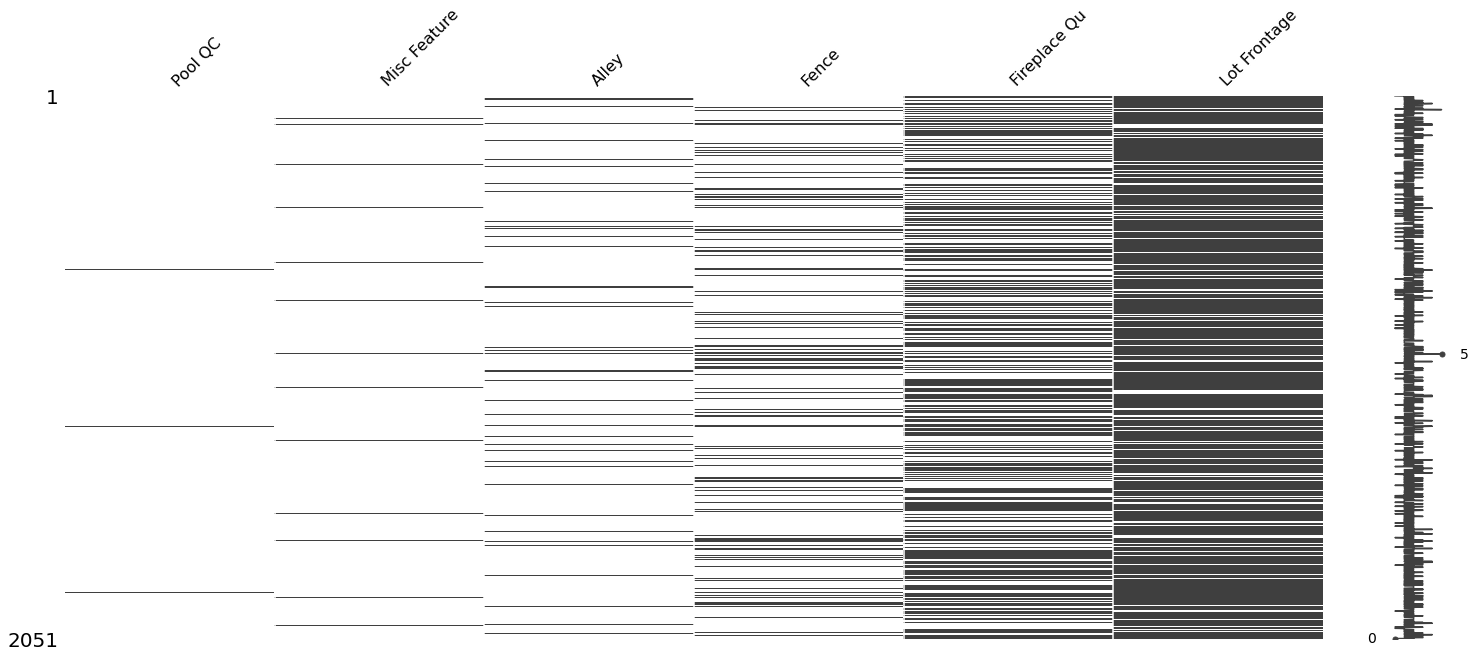

In [15]:
msno.matrix(datatrain[features_significant_null])

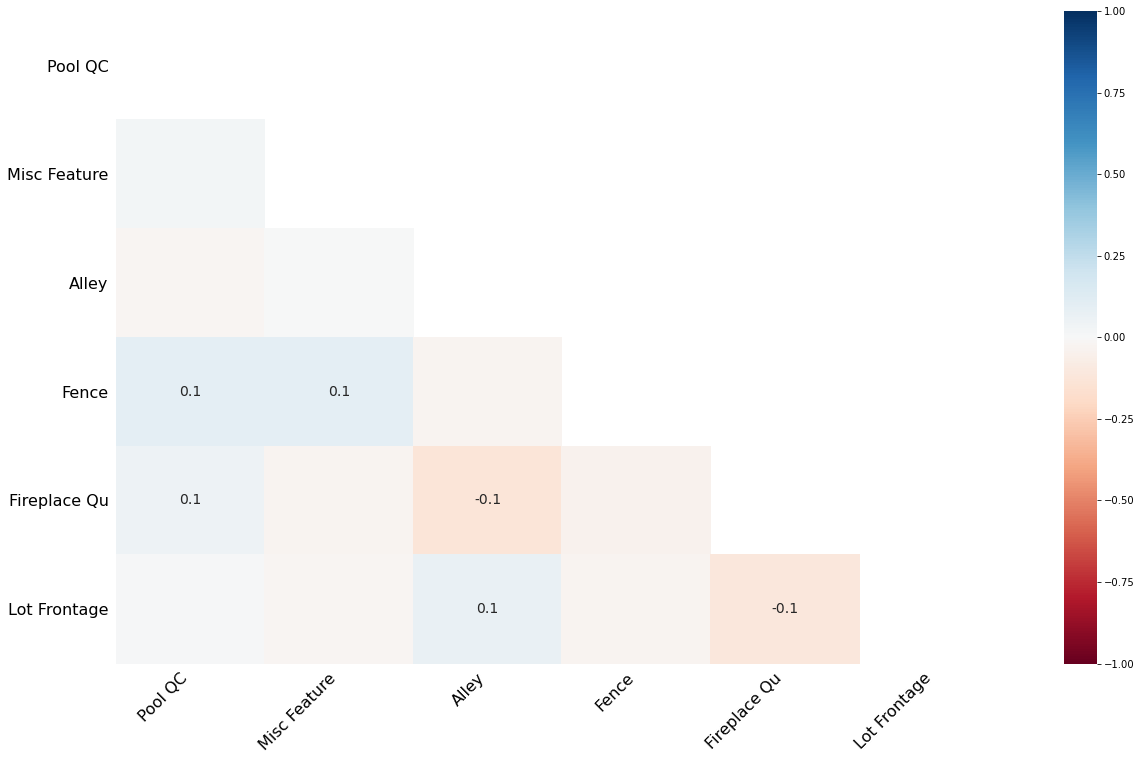

In [16]:
msno.heatmap(datatrain[features_significant_null])

Text(0.5, 1.0, 'Sale price vs lot frontage')

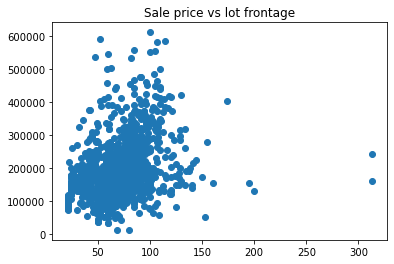

In [17]:
# assessing lot frontage

#to gauge some relationship 

plt.scatter(datatrain['Lot Frontage'], datatrain['SalePrice'])
plt.title('Sale price vs lot frontage')

#seems like we have outliers

In [18]:
#filtering out outliers

display(datatrain[datatrain['Lot Frontage']>200])

#i'll remove row 960 and 1335

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1335,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,242000


In [19]:
datatrain.drop(index = [960, 1335], inplace = True)

C:\Users\Leemei\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Leemei\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([127., 277., 682., 446., 131.,  33.,  16.,   4.,   1.,   2.]),
 array([ 21. ,  38.9,  56.8,  74.7,  92.6, 110.5, 128.4, 146.3, 164.2,
        182.1, 200. ]),
 <a list of 10 Patch objects>)

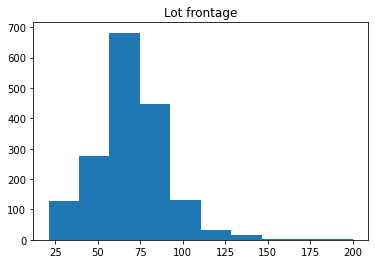

In [20]:
lot_frontage = datatrain['Lot Frontage']

lot_frontage_mean = round(lot_frontage.mean())
lot_frontage_mode = round(lot_frontage.mode())
lot_frontage_median = round(lot_frontage.median())

plt.title('Lot frontage')
plt.hist(lot_frontage)

In [21]:
print('lot frontage mean is', lot_frontage_mean)
print('lot frontage median is', lot_frontage_median)
print('lot frontage mode is', lot_frontage_mode)

lot frontage mean is 69
lot frontage median is 68
lot frontage mode is 0    60.0
dtype: float64


Comment - Looking at the mean and median lot frontage data of about 69 and 68 respectively, I shall replace NAN lot frontage with the mean, i.e. 69

In [22]:
datatrain['Lot Frontage'].fillna(lot_frontage_mean, inplace = True)

In [23]:
#check
datatrain['Lot Frontage'].isnull().sum()

0

In [24]:
# assessing Alley

print(datatrain['Alley'].unique())
print(datatrain['Alley'].value_counts())

[nan 'Pave' 'Grvl']
Grvl    85
Pave    55
Name: Alley, dtype: int64


In [25]:
# the house will either have an alley or no alley... 
# type of alley wont be crucial.. hence, i'll just assign 'pave' and 'grvl' as 1 and Nan as 0

datatrain['Alley'].fillna(0, inplace = True)

datatrain['Alley'] = datatrain['Alley'].replace('Pave', 1)
datatrain['Alley'] = datatrain['Alley'].replace('Grvl', 1)

In [26]:
#check
datatrain['Alley'].isnull().sum()

0

In [27]:
#assessing Fence

#not all houses come with fence
#i shall assign 'None' for those without value

datatrain['Fence'].fillna('None', inplace = True)

In [28]:
#check
datatrain['Fence'].isnull().sum()

0

In [29]:
# assessing Fireplace Quality 

# I noted that there is Fireplaces data column available in addition to Fireplace Quality column 

Comment - Based on what I read [here](https://www.angi.com/articles/how-much-does-repairing-fireplace-or-woodstove-cost.htm#:~:text=Repairing%20a%20fireplace%20costs%20an,%24100%20to%20%24300%20on%20average.), to repair a fireplace is not costly. It can be as low as \\$160 and as high as \\$5,000. Given the relatively low repair cost, which is an indication that fireplace condition is not an important factor, I'm going to deduce that fireplace quality is not an important feature and given the high number of missing variables, fireplace qu will be dropped. Fireplaces column should be sufficient.


In [30]:
# drop Fireplace Qu colummn

FireplaceQu = ['Fireplace Qu'] 
datatrain.drop(columns = FireplaceQu, inplace = True)

In [31]:
#assessing Pool Qc 

# I assess the other pool-related feature, i.e. Pool Area.  

datatrain['Pool Area'].value_counts()

0      2041
561       1
519       1
800       1
738       1
648       1
576       1
368       1
228       1
Name: Pool Area, dtype: int64

In [32]:
# Comment - turns out, a significant part of pool area is zero.. which is an indication most data has no pool. 
# but, pool itself is an important variable.. so i cant drop the column entirely
# hence, I'll just assign 1 (with pool) and 0 (no pool) 

In [33]:
datatrain['Pool Area'] = np.where(datatrain['Pool Area'] == 0, 0, 1)

In [34]:
datatrain['Pool Area'].value_counts()

0    2041
1       8
Name: Pool Area, dtype: int64

In [35]:
#with that, I'll just drop Pool Qc.

PoolQC = ['Pool QC'] 
datatrain.drop(columns = PoolQC, inplace = True)

In [36]:
# assessing Misc Feature

print(datatrain['Misc Feature'].unique())
print(datatrain['Misc Feature'].value_counts())

[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64


In [37]:
# filling the Nan with 'None'

datatrain['Misc Feature'].fillna('None', inplace = True)

In [38]:
# checking whether i've completely dealt with all missing values

# datatrain.info()

### Feature engineering 

Comment - After i'm done dealing with missing values, there is still a lot more work to be done, namely:
- Outliers - anymore to be dealt with?
- Categorical data - which data to be one hot-coded?
- Additional features to be added?

In [39]:
datatrain.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2049.000000,2.049000e+03,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.00000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1474.122987,7.135820e+08,57.025378,68.808199,10030.358712,0.068326,6.109810,5.561737,1971.696925,1984.167399,98.334309,439.554417,47.982430,567.699854,1055.236701,1162.325037,329.18692,5.518302,1497.030259,0.426061,0.063446,1.576867,0.370913,2.842850,1.042948,6.431918,0.589556,1868.613470,1.775500,472.964373,93.820888,47.460713,22.593948,2.593948,16.527574,0.003904,51.624695,6.220107,2007.775500,181450.638360
std,844.380142,1.886939e+08,42.837269,19.905509,6628.642593,0.252366,1.424241,1.104510,30.180858,21.033892,173.713769,446.865954,165.037776,445.143333,435.931214,388.385936,425.59571,51.093509,492.086491,0.521533,0.251705,0.549389,0.501027,0.826619,0.209888,1.555100,0.636541,454.340431,0.765698,215.229291,128.568036,66.552651,59.870165,25.241801,57.399890,0.062378,573.671628,2.741618,1.312636,79284.647484
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.00000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.000000,5.284581e+08,20.000000,60.000000,7500.000000,0.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.000000,0.00000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129800.000000
50%,1486.000000,5.354532e+08,50.000000,69.000000,9405.000000,0.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.000000,994.000000,1092.000000,0.00000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2199.000000,9.071800e+08,70.000000,78.000000,11500.000000,0.000000,7.000000,6.000000,2001.000000,2004.000000,158.000000,733.000000,0.000000,811.000000,1318.000000,1404.000000,691.00000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,200.000000,159000.000000,1.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1474.000000,2336.000000,5095.000000,5095.000000,1862.00000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1356.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,1.000000,17000.000000,12.000000,2010.000000,611657.000000


Outliers

Text(0.5, 1.0, 'Sale price vs Lot Area')

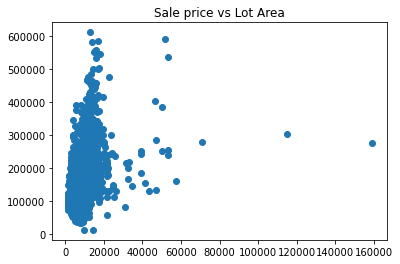

In [40]:
# potential outlier - Lot area

plt.scatter(datatrain['Lot Area'], datatrain['SalePrice'])
plt.title('Sale price vs Lot Area')

#seems like there is an outlier for Lot Area. I shall drop Lot area of above 100000

In [41]:
datatrain[datatrain['Lot Area'] > 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,69.0,159000,Pave,0,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,None,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,69.0,115149,Pave,0,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,None,None,0,6,2007,WD,302000


In [42]:
datatrain.drop(index = [471, 694], inplace = True)

Text(0.5, 1.0, '1st floor square feet')

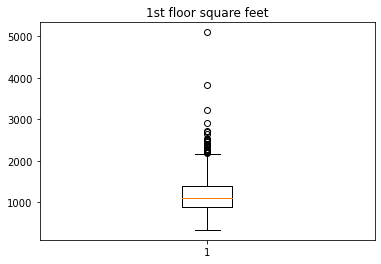

In [43]:
# potential outlier - 1st Floor square feet

plt.boxplot(datatrain['1st Flr SF'])
plt.title('1st floor square feet')

#looking at the boxplot, I shall consider value 4000 and above as outliers 

In [44]:
datatrain[datatrain['1st Flr SF'] >= 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1885,2181,908154195,20,RL,128.0,39290,Pave,0,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,Elev,17000,10,2007,New,183850


In [45]:
datatrain.drop(index = [1885], inplace = True)

Categorical data

In [46]:
datatrain['MS Zoning'].unique()

# I shall choose residential zones only

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [47]:
index_names = datatrain[(datatrain['MS Zoning'] == 'C (all)') | (datatrain['MS Zoning'] == 'A (agr)') | (datatrain['MS Zoning'] == 'I (all)')].index

datatrain.drop(index_names, inplace = True)

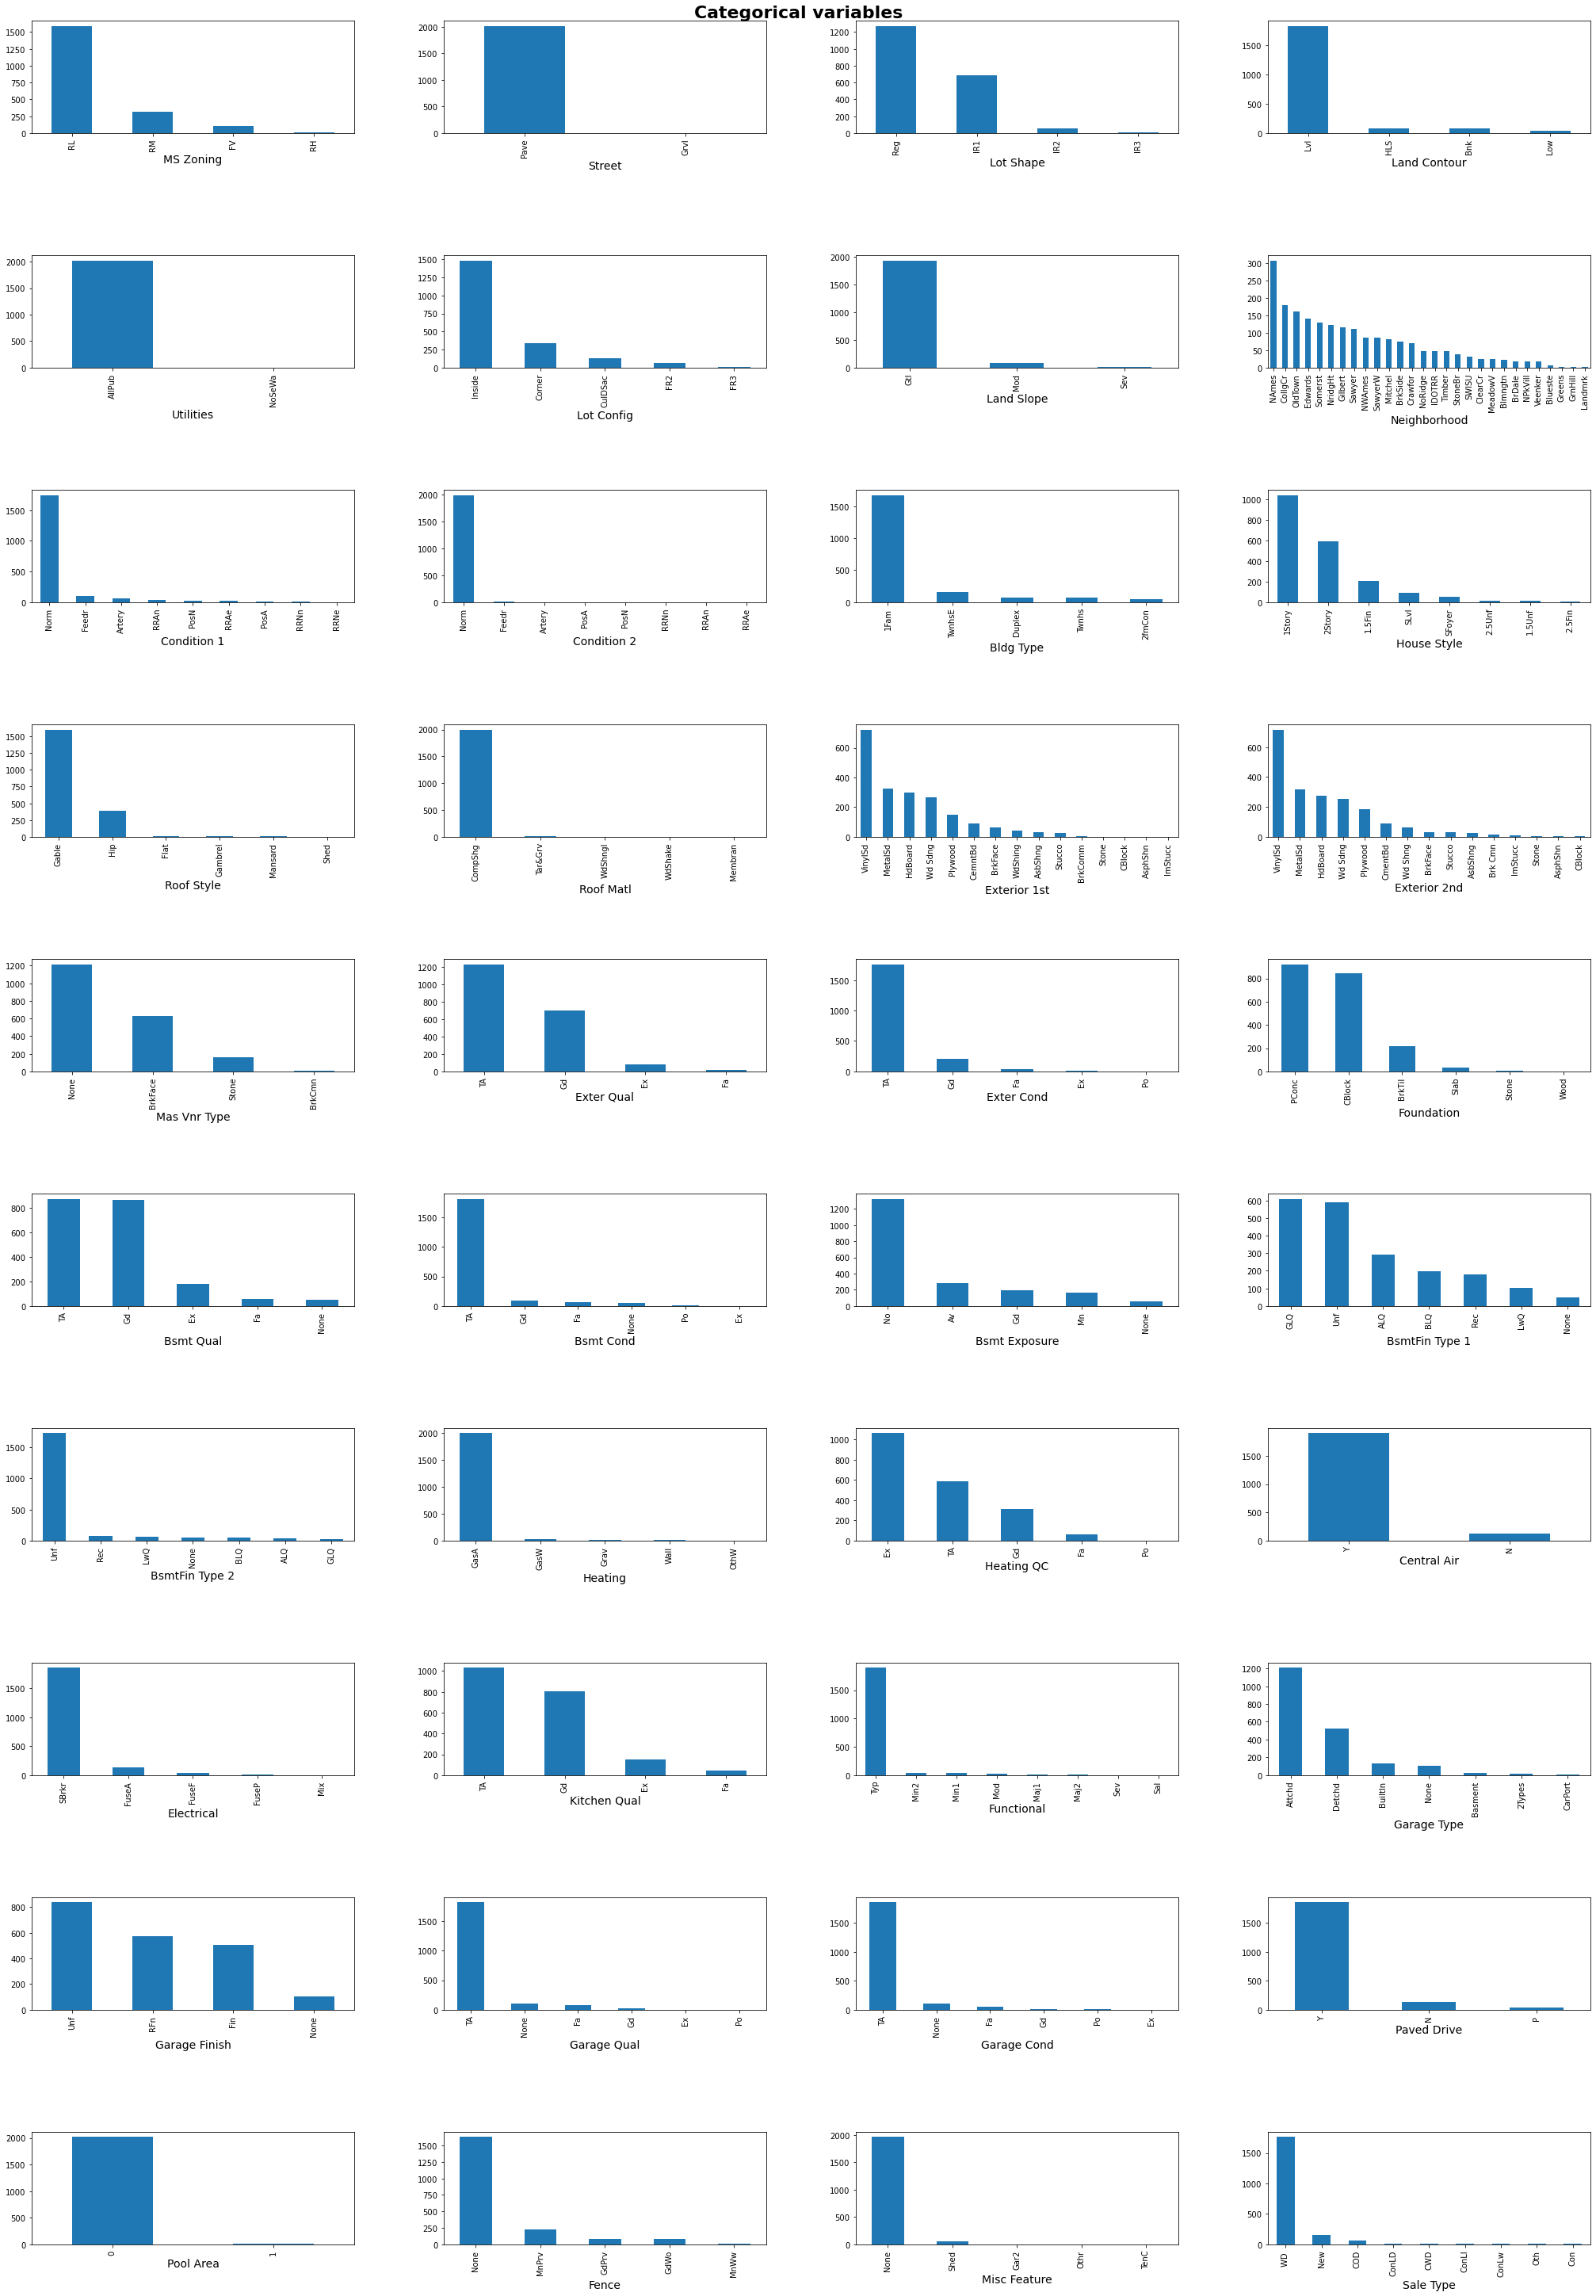

In [48]:
#further analysing categorical data

datatrain_cat=datatrain.select_dtypes(exclude=['int64','float64'])

f, ax= plt.subplots(10,4,figsize=(30,42))
axes=ax.flatten()

for feature,ax in zip(datatrain_cat.columns,axes):
    datatrain_cat[feature].value_counts().plot.bar(ax=ax)
    ax.set_xlabel(feature,fontsize=14)

f.suptitle('Categorical variables',fontsize=22,fontweight='bold')
plt.tight_layout(pad=8)
# plt.show()

Comment:

When i observe these visualisations, I begin to wonder whether it is worth dummifying / one-hot-encoding everything since quite a number of features have major imbalances.

If there are significant imbalances, it may not be worthwhile to assign a distinct category. Hence, the following features will be dropped:
- 1st row - Street will be dropped
- 2nd row - Utilities will be dropped
- 3rd row - Condition 2 (since it's almost a duplicate to Condition 1 anyway)
- 4th row - Roof material
- 5th row - none dropped
- 6th row - none dropped
- 7th row - Heating and Bsmt Fin Type 2 (it's a duplicate to Bsmt Fin Type 1)
- 8th row - none dropped
- 9th row - Garage Condition (seems like Garage Quality and Garage Condition are duplicates. Hence I shall drop Garage Condition)
- 10th row - Misc feature

Additional features added

In [49]:
# assessing anymore features required:

# adding columns for building age (at the time it was sold) and renovation/remodelled age

datatrain['Building age'] = datatrain['Yr Sold'] - datatrain['Year Built']
datatrain['Remodel age'] = datatrain['Yr Sold'] - datatrain['Year Remod/Add']


In [50]:
datatrain.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Building age,Remodel age
0,109,533352170,60,RL,69.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,None,0,3,2010,WD,130500,34,5
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,None,0,4,2009,WD,220000,13,12
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,None,0,1,2010,WD,109000,57,3
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,None,0,4,2010,WD,174000,4,3
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,None,0,3,2010,WD,138500,110,17


In [51]:
# dropping the columns identified earlier
# Since the building age and remodelled age are available, I shall remove the years too

drop_columns = ['Id',
                'PID',
                'Street', 
                'Utilities', 
                'Condition 2', 
                'Roof Matl', 
                'Heating',
                'BsmtFin Type 2',
                'Garage Cond', 
                'Misc Feature', 
                'Yr Sold',
                'Year Remod/Add',
                'Year Built', 
                'Garage Yr Blt']

datatrain.drop(columns= drop_columns, inplace=True)

In [52]:
datatrain.head()    

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Sale Type,SalePrice,Building age,Remodel age
0,60,RL,69.0,13517,0,IR1,Lvl,CulDSac,Gtl,Sawyer,RRAe,1Fam,2Story,6,8,Gable,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,0.0,192.0,725.0,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,Y,0,44,0,0,0,0,None,0,3,WD,130500,34,5
1,60,RL,43.0,11492,0,IR1,Lvl,CulDSac,Gtl,SawyerW,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,0.0,276.0,913.0,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,Y,0,74,0,0,0,0,None,0,4,WD,220000,13,12
2,20,RL,68.0,7922,0,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,5,7,Gable,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,0.0,326.0,1057.0,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,Y,0,52,0,0,0,0,None,0,1,WD,109000,57,3
3,60,RL,73.0,9802,0,Reg,Lvl,Inside,Gtl,Timber,Norm,1Fam,2Story,5,5,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,0.0,384.0,384.0,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,Y,100,0,0,0,0,0,None,0,4,WD,174000,4,3
4,50,RL,82.0,14235,0,IR1,Lvl,Inside,Gtl,SawyerW,Norm,1Fam,1.5Fin,6,8,Gable,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,0.0,676.0,676.0,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,N,0,59,0,0,0,0,None,0,3,WD,138500,110,17


Comment - before I proceed to do one-hot encoding, I check for significance of unique values. If there is only 1 unique value, I shall remove. Not worthwhile to dummify a feature with only 1 value

In [53]:
datatrain['MS SubClass'].value_counts()

20     762
60     393
50     191
120    132
30      94
160     88
70      88
80      86
90      75
190     44
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

In [54]:
# Since there is only 1 value for subclass 150, 

datatrain[datatrain['MS SubClass'] == 150]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Sale Type,SalePrice,Building age,Remodel age
1515,150,RL,69.0,1700,0,Reg,HLS,Inside,Gtl,ClearCr,Norm,Twnhs,1.5Fin,7,5,Gable,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,397.0,0.0,33.0,430.0,TA,Y,SBrkr,880,680,140,1700,1.0,0.0,2,1,2,1,Gd,7,Typ,0,Basment,Fin,1.0,450.0,Gd,Y,188,36,0,0,200,0,None,0,4,WD,148400,26,25


In [55]:
datatrain['Neighborhood'].value_counts()

NAmes      309
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     81
BrkSide     76
Crawfor     71
NoRidge     48
IDOTRR      48
Timber      48
StoneBr     38
SWISU       32
ClearCr     25
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [56]:
# Since there is only 1 and 2 values for GrnHill and Landmrk neighborhood, I shall drop them 

datatrain[(datatrain['Neighborhood'] == 'GrnHill') | (datatrain['Neighborhood'] == 'Landmrk') ]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Sale Type,SalePrice,Building age,Remodel age
463,120,RM,69.0,9763,0,IR1,Lvl,Inside,Gtl,GrnHill,Norm,TwnhsE,1Story,7,5,Gable,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,72.0,328.0,1502.0,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,Attchd,Fin,1.0,286.0,TA,Y,0,0,0,0,0,0,None,0,9,WD,330000,9,9
1121,160,RH,69.0,3612,0,IR1,Lvl,Inside,Gtl,Landmrk,Norm,Twnhs,2Story,6,5,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,0.0,292.0,630.0,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,Detchd,Unf,2.0,484.0,TA,Y,0,48,0,0,0,0,MnPrv,0,6,WD,137000,13,12
1211,120,RM,69.0,8239,0,IR1,Lvl,Inside,Gtl,GrnHill,Norm,TwnhsE,1Story,7,5,Gable,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,None,None,None,None,0.0,0.0,0.0,0.0,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,RFn,1.0,312.0,TA,Y,0,0,0,0,0,0,None,0,11,WD,230000,20,20


In [57]:
datatrain['Exterior 1st'].value_counts()

VinylSd    723
MetalSd    324
HdBoard    300
Wd Sdng    267
Plywood    150
CemntBd     89
BrkFace     63
WdShing     44
AsbShng     30
Stucco      26
BrkComm      3
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior 1st, dtype: int64

In [58]:
datatrain[(datatrain['Exterior 1st'] == 'Stone') | (datatrain['Exterior 1st'] == 'CBlock') | (datatrain['Exterior 1st'] == 'ImStucc') ]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Sale Type,SalePrice,Building age,Remodel age
608,20,RL,90.0,14115,0,IR1,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,1Story,6,7,Gable,Stone,Stone,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,296.0,547.0,230.0,1073.0,Ex,Y,SBrkr,1811,0,0,1811,0.0,0.0,1,0,2,1,Ex,6,Typ,1,Attchd,Fin,2.0,470.0,TA,Y,0,0,280,0,0,0,None,0,7,WD,230000,50,2
664,20,RL,89.0,12461,0,Reg,Lvl,Corner,Gtl,NoRidge,Norm,1Fam,1Story,8,5,Gable,ImStucc,ImStucc,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1456.0,0.0,168.0,1624.0,Ex,Y,SBrkr,1624,0,0,1624,1.0,0.0,2,0,2,1,Gd,5,Typ,1,Attchd,RFn,3.0,757.0,TA,Y,0,114,192,0,0,0,GdPrv,0,7,WD,262000,12,11
821,50,RL,90.0,5400,0,Reg,Lvl,Corner,Gtl,OldTown,Artery,1Fam,1.5Fin,4,6,Gable,CBlock,CBlock,None,0.0,Fa,TA,PConc,TA,TA,No,ALQ,315.0,105.0,420.0,840.0,Ex,Y,SBrkr,840,534,0,1374,0.0,0.0,1,0,2,1,TA,6,Typ,0,Detchd,Fin,1.0,338.0,TA,Y,0,0,198,0,0,0,None,0,10,WD,105000,89,59
1243,20,RL,69.0,15498,0,IR1,Lvl,Corner,Gtl,Timber,Norm,1Fam,1Story,8,6,Hip,Stone,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,ALQ,1165.0,400.0,0.0,1565.0,TA,Y,SBrkr,2898,0,0,2898,1.0,0.0,2,0,2,1,Gd,10,Typ,1,Attchd,Fin,2.0,665.0,TA,Y,0,72,174,0,0,0,None,0,5,COD,287000,32,32


In [59]:
datatrain['Exterior 2nd'].value_counts()

VinylSd    718
MetalSd    317
HdBoard    274
Wd Sdng    254
Plywood    183
CmentBd     89
Wd Shng     62
BrkFace     33
Stucco      29
AsbShng     26
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [60]:
datatrain[datatrain['Exterior 2nd'] == 'Stone']

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Sale Type,SalePrice,Building age,Remodel age
608,20,RL,90.0,14115,0,IR1,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,1Story,6,7,Gable,Stone,Stone,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,296.0,547.0,230.0,1073.0,Ex,Y,SBrkr,1811,0,0,1811,0.0,0.0,1,0,2,1,Ex,6,Typ,1,Attchd,Fin,2.0,470.0,TA,Y,0,0,280,0,0,0,None,0,7,WD,230000,50,2
772,90,RL,60.0,7200,0,Reg,Lvl,Inside,Gtl,NAmes,Norm,Duplex,1Story,4,5,Gable,BrkFace,Stone,None,0.0,TA,TA,Slab,None,None,None,None,0.0,0.0,0.0,0.0,Fa,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,Detchd,Unf,2.0,420.0,TA,Y,0,0,0,0,0,0,None,0,6,WD,90000,60,59
913,20,RL,69.0,32668,0,IR1,Lvl,CulDSac,Gtl,Crawfor,Norm,1Fam,1Story,6,3,Hip,Wd Sdng,Stone,None,0.0,Gd,TA,PConc,TA,TA,No,Rec,1219.0,0.0,816.0,2035.0,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,Attchd,RFn,2.0,484.0,TA,Y,0,0,200,0,0,0,None,0,3,WD,200624,50,32
1686,90,RL,60.0,8544,0,Reg,Lvl,Inside,Gtl,NAmes,Norm,Duplex,1Story,3,4,Gable,Stucco,Stone,None,0.0,TA,TA,CBlock,None,None,None,None,0.0,0.0,0.0,0.0,Gd,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,Detchd,Unf,2.0,400.0,TA,Y,0,0,0,0,0,0,None,0,7,WD,93500,56,56
1859,90,RL,60.0,8544,0,Reg,Lvl,Corner,Gtl,NAmes,Norm,Duplex,1Story,3,4,Gable,BrkFace,Stone,None,0.0,TA,TA,Slab,None,None,None,None,0.0,0.0,0.0,0.0,Fa,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,Detchd,Unf,2.0,400.0,TA,Y,0,0,0,0,0,0,None,0,12,WD,81400,56,56
2048,50,RL,57.0,7558,0,Reg,Bnk,Inside,Gtl,Crawfor,Norm,1Fam,1.5Fin,6,6,Gable,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,0.0,896.0,896.0,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,Detchd,Unf,2.0,342.0,Fa,Y,0,0,0,0,0,0,None,0,3,WD,177000,81,59


In [61]:
#dropping categories with only 1 unique value

datatrain.drop(index = [1515, 463, 1121, 1211, 608, 664, 821, 1243, 608, 772, 913, 1686, 1859, 2048], inplace = True)

Encoding of categorical data

In [62]:
categorical_variable = [i for i in datatrain.columns if datatrain[i].dtype == object ]

categorical_variable

['MS Zoning',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Paved Drive',
 'Fence',
 'Sale Type']

We will do one-hot encoding for nominal variables and ordinal encoding for ordinal variables. 

In [63]:
#nominal variables

cat_var_train_nom = ['MS SubClass',
                     'MS Zoning',
    'Alley',
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Condition 1',
    'Bldg Type',
    'House Style',
    'Roof Style',
    'Exterior 1st',
    'Exterior 2nd', 
    'Mas Vnr Type',
    'Foundation',
    'Central Air',
    'Garage Type',
'Sale Type']


In [64]:
datatrain = pd.get_dummies(datatrain, columns= cat_var_train_nom, drop_first=True)

In [65]:
datatrain.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,SalePrice,Building age,Remodel age,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_1,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,69.0,13517,IR1,Gtl,6,8,289.0,Gd,TA,TA,TA,No,GLQ,533.0,0.0,192.0,725.0,Ex,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,RFn,2.0,475.0,TA,Y,0,44,0,0,0,0,None,0,3,130500,34,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,IR1,Gtl,7,5,132.0,Gd,TA,Gd,TA,No,GLQ,637.0,0.0,276.0,913.0,Ex,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,RFn,2.0,559.0,TA,Y,0,74,0,0,0,0,None,0,4,220000,13,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,Reg,Gtl,5,7,0.0,TA,Gd,TA,TA,No,GLQ,731.0,0.0,326.0,1057.0,TA,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Unf,1.0,246.0,TA,Y,0,52,0,0,0,0,None,0,1,109000,57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

Ordinal variable

In [66]:
# lot shape

def lot_shape(x):
    if x == 'IR3':
        return 0
    elif x == 'IR2':
        return 1 
    elif x == 'IR1':
        return 2 
    elif x == 'Reg':
        return 3

datatrain['Lot Shape'] = datatrain['Lot Shape'].map(lot_shape)

In [67]:
# Land Slope

def conv_ordinal(x):
    if x == 'Sev':
        return 0
    elif x == 'Mod':
        return 1 
    elif x == 'Gtl':
        return 2 

datatrain['Land Slope'] = datatrain['Land Slope'].map(conv_ordinal)

In [68]:
# exter Qual

def conv_ordinal(x):
    if x == 'Po':
        return 0
    elif x == 'Fa':
        return 1 
    elif x == 'TA':
        return 2
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

datatrain['Exter Qual'] = datatrain['Exter Qual'].map(conv_ordinal)

In [69]:
#Exter Cond

def conv_ordinal(x):
    if x == 'Po':
        return 0
    elif x == 'Fa':
        return 1 
    elif x == 'TA':
        return 2
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

datatrain['Exter Cond'] = datatrain['Exter Cond'].map(conv_ordinal)

In [70]:
def conv_ordinal(x):
    if x == 'None':
        return 0
    elif x == 'Po':
        return 1
    elif x == 'Fa':
        return 2 
    elif x == 'TA':
        return 3
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5

datatrain['Bsmt Qual'] = datatrain['Bsmt Qual'].map(conv_ordinal)

In [71]:
def conv_ordinal(x):
    if x == 'None':
        return 0
    elif x == 'Po':
        return 1
    elif x == 'Fa':
        return 2 
    elif x == 'TA':
        return 3
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5

datatrain['Bsmt Cond'] = datatrain['Bsmt Cond'].map(conv_ordinal)

In [72]:
def conv_ordinal(x):
    if x == 'None':
        return 0
    elif x == 'No':
        return 1
    elif x == 'Mn':
        return 2 
    elif x == 'Av':
        return 3
    elif x == 'Gd':
        return 4

datatrain['Bsmt Exposure'] = datatrain['Bsmt Exposure'].map(conv_ordinal)

In [73]:
def conv_ordinal(x):
    if x == 'None':
        return 0
    elif x == 'Unf':
        return 1
    elif x == 'LwQ':
        return 2 
    elif x == 'Rec':
        return 3
    elif x == 'BLQ':
        return 4
    elif x == 'ALQ':
        return 5
    elif x == 'GLQ':
        return 6

datatrain['BsmtFin Type 1'] = datatrain['BsmtFin Type 1'].map(conv_ordinal)

In [74]:
def conv_ordinal(x):
    if x == 'Po':
        return 0
    elif x == 'Fa':
        return 1
    elif x == 'TA':
        return 2 
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

datatrain['Heating QC'] = datatrain['Heating QC'].map(conv_ordinal)

In [75]:
def conv_ordinal(x):
    if x == 'Mix':
        return 0
    elif x == 'FuseP':
        return 1
    elif x == 'FuseF':
        return 2 
    elif x == 'FuseA':
        return 3
    elif x == 'SBrkr':
        return 4

datatrain['Electrical'] = datatrain['Electrical'].map(conv_ordinal)

In [76]:
def conv_ordinal(x):
    if x == 'Po':
        return 0
    elif x == 'Fa':
        return 1
    elif x == 'TA':
        return 2 
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

datatrain['Kitchen Qual'] = datatrain['Kitchen Qual'].map(conv_ordinal)

In [77]:
def conv_ordinal(x):
    if x == 'Sal':
        return 0
    elif x == 'Sev':
        return 1
    elif x == 'Maj2':
        return 2 
    elif x == 'Maj1':
        return 3
    elif x == 'Mod':
        return 4
    elif x == 'Min2':
        return 5
    elif x == 'Min1':
        return 6
    elif x == 'Typ':
        return 7

datatrain['Functional'] = datatrain['Functional'].map(conv_ordinal)

In [78]:
def conv_ordinal(x):
    if x == 'None':
        return 0
    elif x == 'Unf':
        return 1
    elif x == 'RFn':
        return 2
    elif x == 'Fin':
        return 3 

datatrain['Garage Finish'] = datatrain['Garage Finish'].map(conv_ordinal)

In [79]:
def conv_ordinal(x):
    if x == 'None':
        return 0
    elif x == 'Po':
        return 1
    elif x == 'Fa':
        return 2
    elif x == 'TA':
        return 3 
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5

datatrain['Garage Qual'] = datatrain['Garage Qual'].map(conv_ordinal)

In [80]:
def conv_ordinal(x):
    if x == 'N':
        return 0
    elif x == 'P':
        return 1
    elif x == 'Y':
        return 2

datatrain['Paved Drive'] = datatrain['Paved Drive'].map(conv_ordinal)

In [81]:
def conv_ordinal(x):
    if x == 'None':
        return 0
    elif x == 'MnWw':
        return 1
    elif x == 'GdWo':
        return 2 
    elif x == 'MnPrv':
        return 3
    elif x == 'GdPrv':
        return 4

datatrain['Fence'] = datatrain['Fence'].map(conv_ordinal)

In [82]:
datatrain.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,SalePrice,Building age,Remodel age,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_1,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,69.0,13517,2,2,6,8,289.0,3,2,3,3,1,6,533.0,0.0,192.0,725.0,4,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,2,2.0,475.0,3,2,0,44,0,0,0,0,0,0,3,130500,34,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,2,2,7,5,132.0,3,2,4,3,1,6,637.0,0.0,276.0,913.0,4,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,2,2.0,559.0,3,2,0,74,0,0,0,0,0,0,4,220000,13,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,3,2,5,7,0.0,2,3,3,3,1,6,731.0,0.0,326.0,1057.0,2,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,1,1.0,246.0,3,2,0,52,0,0,0,0,0,0,1,109000,57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,73.0,9802,3,2,5

In [83]:
#save the cleaned-up train file 

datatrain.to_csv(r'C:\Users\Leemei\Data Science\GA\projects\project_2\datasets\datatrain(cleanup).csv', index = False)

In [84]:
datatrain.shape

(2011, 171)